In [1]:
#mount the drive on collab. Load the data onto your drive first tho
from google.colab import drive
drive.mount('content')

Mounted at content


In [2]:
%cd content/My Drive/Project_emotion

/content/content/My Drive/Project_emotion


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import cv2

In [4]:
df_expressions= pd.read_csv('icml_face_data.csv')

In [5]:
df_expressions.head(5)

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
3,2,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...
4,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...


In [6]:
df_expressions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24568 entries, 0 to 24567
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  24568 non-null  int64 
 1    pixels  24568 non-null  object
dtypes: int64(1), object(1)
memory usage: 384.0+ KB


In [7]:
df_expressions.columns

Index(['emotion', ' pixels'], dtype='object')

In [8]:
#Renaming column
df_expressions.rename(columns={" pixels":"pixels"},inplace=True)

In [9]:
df_expressions['pixels']

0        70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1        151 150 147 155 148 133 111 140 170 174 182 15...
2        24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
3        20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...
4        77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...
                               ...                        
24563    0 39 81 80 104 97 51 64 68 46 41 67 53 68 70 5...
24564    181 177 176 156 178 144 136 132 122 107 131 16...
24565    178 174 172 173 181 188 191 194 196 199 200 20...
24566    17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...
24567    30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...
Name: pixels, Length: 24568, dtype: object

In [10]:
#Convert string into int
df_expressions['pixels']=df_expressions['pixels'].apply(lambda x:np.array(x.split(' ')).astype('float32'))

In [11]:
df_expressions['pixels'].apply(lambda x: x.reshape(48,48))

0        [[70.0, 80.0, 82.0, 72.0, 58.0, 58.0, 60.0, 63...
1        [[151.0, 150.0, 147.0, 155.0, 148.0, 133.0, 11...
2        [[24.0, 32.0, 36.0, 30.0, 32.0, 23.0, 19.0, 20...
3        [[20.0, 17.0, 19.0, 21.0, 25.0, 38.0, 42.0, 42...
4        [[77.0, 78.0, 79.0, 79.0, 78.0, 75.0, 60.0, 55...
                               ...                        
24563    [[0.0, 39.0, 81.0, 80.0, 104.0, 97.0, 51.0, 64...
24564    [[181.0, 177.0, 176.0, 156.0, 178.0, 144.0, 13...
24565    [[178.0, 174.0, 172.0, 173.0, 181.0, 188.0, 19...
24566    [[17.0, 17.0, 16.0, 23.0, 28.0, 22.0, 19.0, 17...
24567    [[30.0, 28.0, 28.0, 29.0, 31.0, 30.0, 42.0, 68...
Name: pixels, Length: 24568, dtype: object

In [12]:
# why do we use cv2.resize and why particular interpolation
def resize(x):
  
  img = x.reshape(48, 48)
  return cv2.resize(img, dsize=(96, 96), interpolation = cv2.INTER_CUBIC)

In [13]:
df_expressions['pixels']=df_expressions['pixels'].apply(lambda x: resize(x))

In [14]:
df_expressions['pixels'][0].shape

(96, 96)

In [15]:
df_expressions.isnull().sum()

emotion    0
pixels     0
dtype: int64

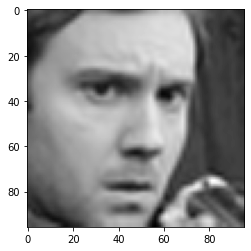

In [16]:
plt.imshow(df_expressions['pixels'][0],cmap='gray')

In [17]:
df_expressions['emotion']= df_expressions['emotion'].map({0:'anger', 1:'disgust', 2:'sad', 3:'happiness', 4: 'surprise'})

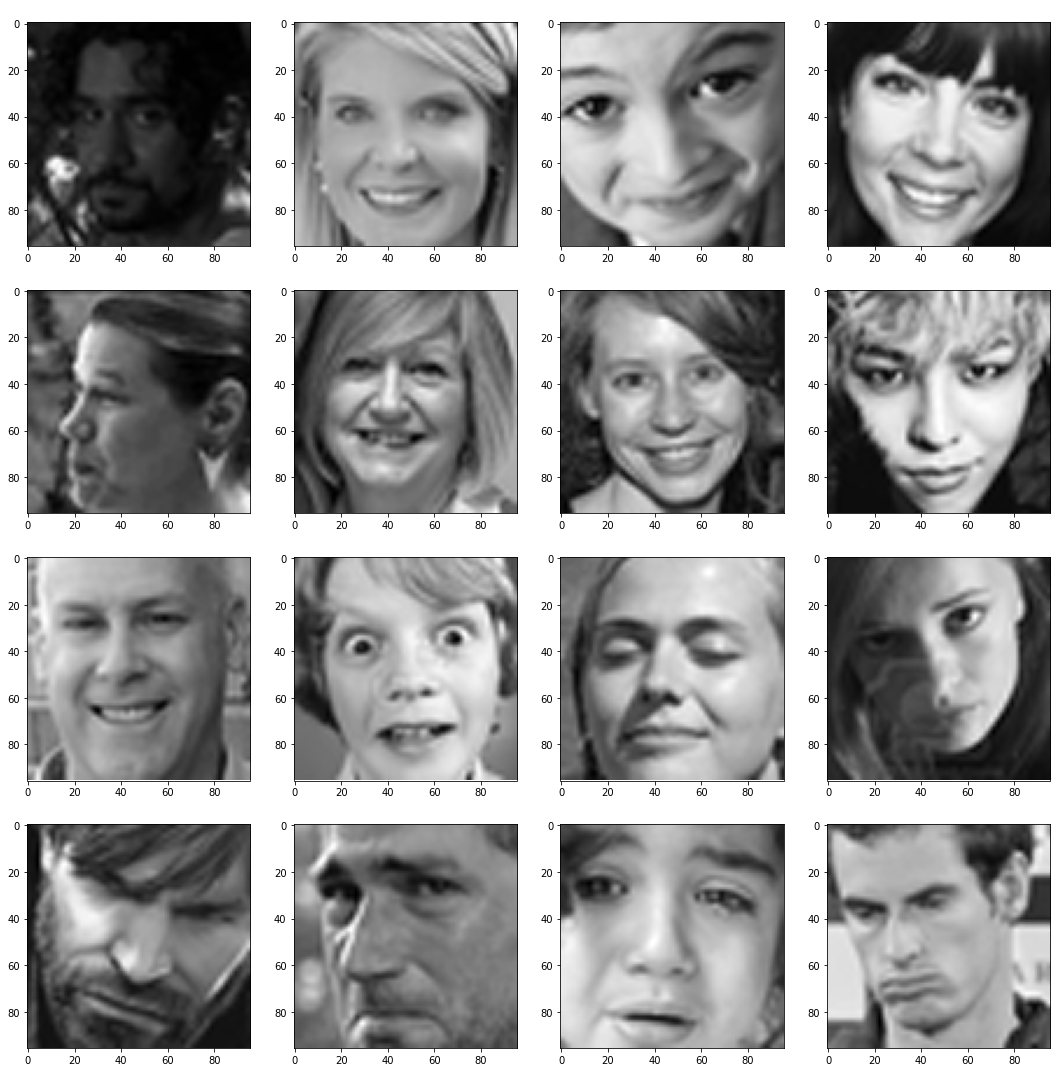

In [18]:
fig= plt.figure(figsize=(15,15))
for i in range(16):
  k=np.random.randint(1,len(df_expressions))
  ax=fig.add_subplot(4,4,i+1)
  image=plt.imshow(df_expressions['pixels'][k],cmap='gray')
  plt.title(df_expressions['emotion'][k],color='white')
fig.tight_layout()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


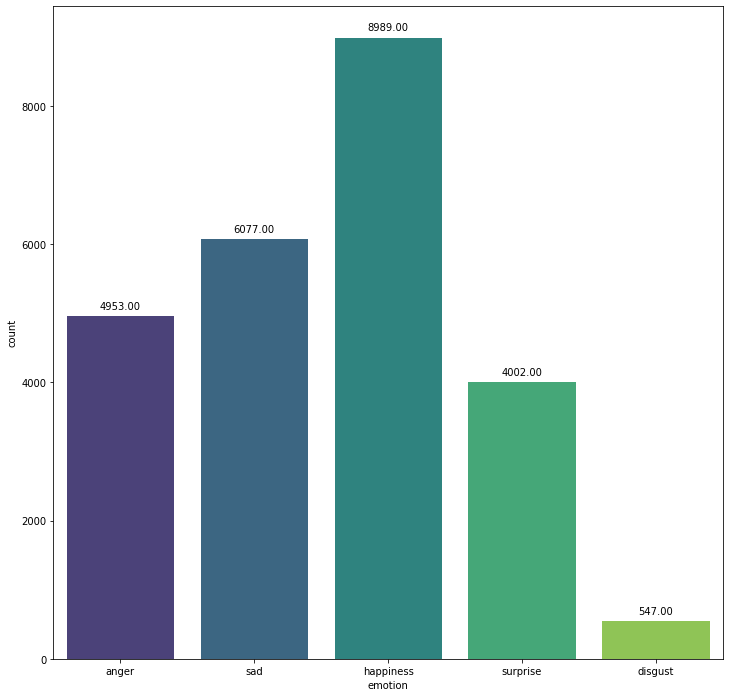

In [19]:
plt.figure(figsize=(12,12))
splot=sns.countplot(df_expressions['emotion'],palette='viridis')
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

NameError: ignored

In [21]:
X=df_expressions['pixels']
y=pd.get_dummies(df_expressions['emotion'])

In [22]:
y.values

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       ...,
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [23]:
X[0].shape

(96, 96)

In [24]:
X=np.stack(X,axis=0)
X=X.reshape(24568,96,96,1)

In [25]:
print(X.shape,y.shape)

(24568, 96, 96, 1) (24568, 5)


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101,shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X, y, test_size=0.5, random_state=101,shuffle=False)


In [27]:
X_train=X_train/255
X_test=X_test/255
X_val=X_val/255
print(X_train.shape,X_test.shape,X_val.shape)
print(y_train.shape,y_test.shape,y_val.shape)

(20882, 96, 96, 1) (12284, 96, 96, 1) (12284, 96, 96, 1)
(20882, 5) (12284, 5) (12284, 5)


In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_gen= ImageDataGenerator( rotation_range = 15,
    width_shift_range = 0.1,
    height_shift_range = 0.,
    shear_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    vertical_flip= True,
    brightness_range=[1.1,1.5],
    fill_mode = "nearest")

In [29]:
def res_block(X, filter, stage):

  # Convolutional_block
  X_copy = X

  f1 , f2, f3 = filter

  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = MaxPool2D((2,2))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)


  # Short path
  X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)
  X_copy = MaxPool2D((2,2))(X_copy)
  X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 1
  X_copy = X


  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 2
  X_copy = X


  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)


  return X

In [30]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import layers, optimizers
from tensorflow.keras.initializers import * 
from tensorflow.keras.applications.resnet50 import ResNet50

In [31]:
input_shape = (96, 96, 1)

# Input tensor shape
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((3, 3))(X_input)

# 1 - stage
X = Conv2D(64, (7, 7), strides= (2, 2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3, 3), strides= (2, 2))(X)


# 2 - stage
X = res_block(X, filter= [64, 64, 256], stage= 2)

# 3 - stage
X = res_block(X, filter= [128, 128, 512], stage= 3)

# 4 - stage
X = res_block(X, filter= [256, 256, 1024], stage= 4)

# Average Pooling
X = AveragePooling2D((2, 2), name = 'Averagea_Pooling')(X)

# Final layer
X = Flatten()(X)
X = Dense(4096, activation = 'relu')(X)
X = Dropout(0.2)(X)
X = Dense(2048, activation = 'relu')(X)
X = Dropout(0.2)(X)
X = Dense(5, activation = 'softmax', name = 'Dense_final', kernel_initializer= glorot_uniform(seed = 0))(X)

expressions_model = Model( inputs= X_input, outputs = X, name = 'Resnet18')

expressions_model.summary()

Model: "Resnet18"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 96, 96, 1)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 102, 102, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 48, 48, 64)   3200        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 48, 48, 64)   256         conv1[0][0]                      
___________________________________________________________________________________________

In [32]:
expressions_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#earlystopping= EarlyStopping(monitor='val_loss', mode = 'min', verbose = 1, patience = 20)


In [45]:
history = expressions_model.fit(train_data_gen.flow(X_train, y_train, batch_size=64),
	validation_data=(X_val, y_val), steps_per_epoch=len(X_train) // 64,
	epochs= 50)

Epoch 1/50
326/326 [==============================] - 28s 85ms/step - loss: 1.5634 - accuracy: 0.3618 - val_loss: 1.4480 - val_accuracy: 0.2480
Epoch 2/50
326/326 [==============================] - 27s 84ms/step - loss: 1.2488 - accuracy: 0.4650 - val_loss: 1.6133 - val_accuracy: 0.2480
Epoch 3/50
326/326 [==============================] - 27s 83ms/step - loss: 1.0997 - accuracy: 0.5447 - val_loss: 1.4659 - val_accuracy: 0.3672
Epoch 4/50
326/326 [==============================] - 27s 84ms/step - loss: 1.0229 - accuracy: 0.5819 - val_loss: 1.7377 - val_accuracy: 0.2480
Epoch 5/50
326/326 [==============================] - 27s 83ms/step - loss: 0.9821 - accuracy: 0.6084 - val_loss: 1.5757 - val_accuracy: 0.2480
Epoch 6/50
326/326 [==============================] - 27s 82ms/step - loss: 0.9440 - accuracy: 0.6306 - val_loss: 3.7027 - val_accuracy: 0.3672
Epoch 7/50
326/326 [==============================] - 27s 83ms/step - loss: 0.8962 - accuracy: 0.6496 - val_loss: 1.5162 - val_accuracy:

KeyboardInterrupt: ignored

In [65]:
expressions_model.evaluate(X_test,y_test)

384/384 [==============================] - 3s 7ms/step - loss: 1.7177 - accuracy: 0.1977


[1.7176685333251953, 0.19765548408031464]